# Lecture 12 Spatial Data analysis
## Basics of spatial data

### Vector vs. raster data
- #### Vector
    - Vector data represent geometries in the world.
    - You can zoom into vectors without losing resolution.
    - Types of Vector data
        - Points
        - Lines
        - Polygons
    - Spatial attributes are usually associated with Vector data
    - Vector data is often stored in .shp (shape file)

- #### Raster 
    - grid of pixels. Each pixel within a raster has a value, such as color
    

#### Open google map: compare vector (default view) and raster (satellite view) data

### Coordinate Reference Systems (CRS)
Coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities. A spatial reference system defines a specific map projection, as well as transformations between different spatial reference systems.
When combining datasets, the spatial objects MUST have the same reference system.
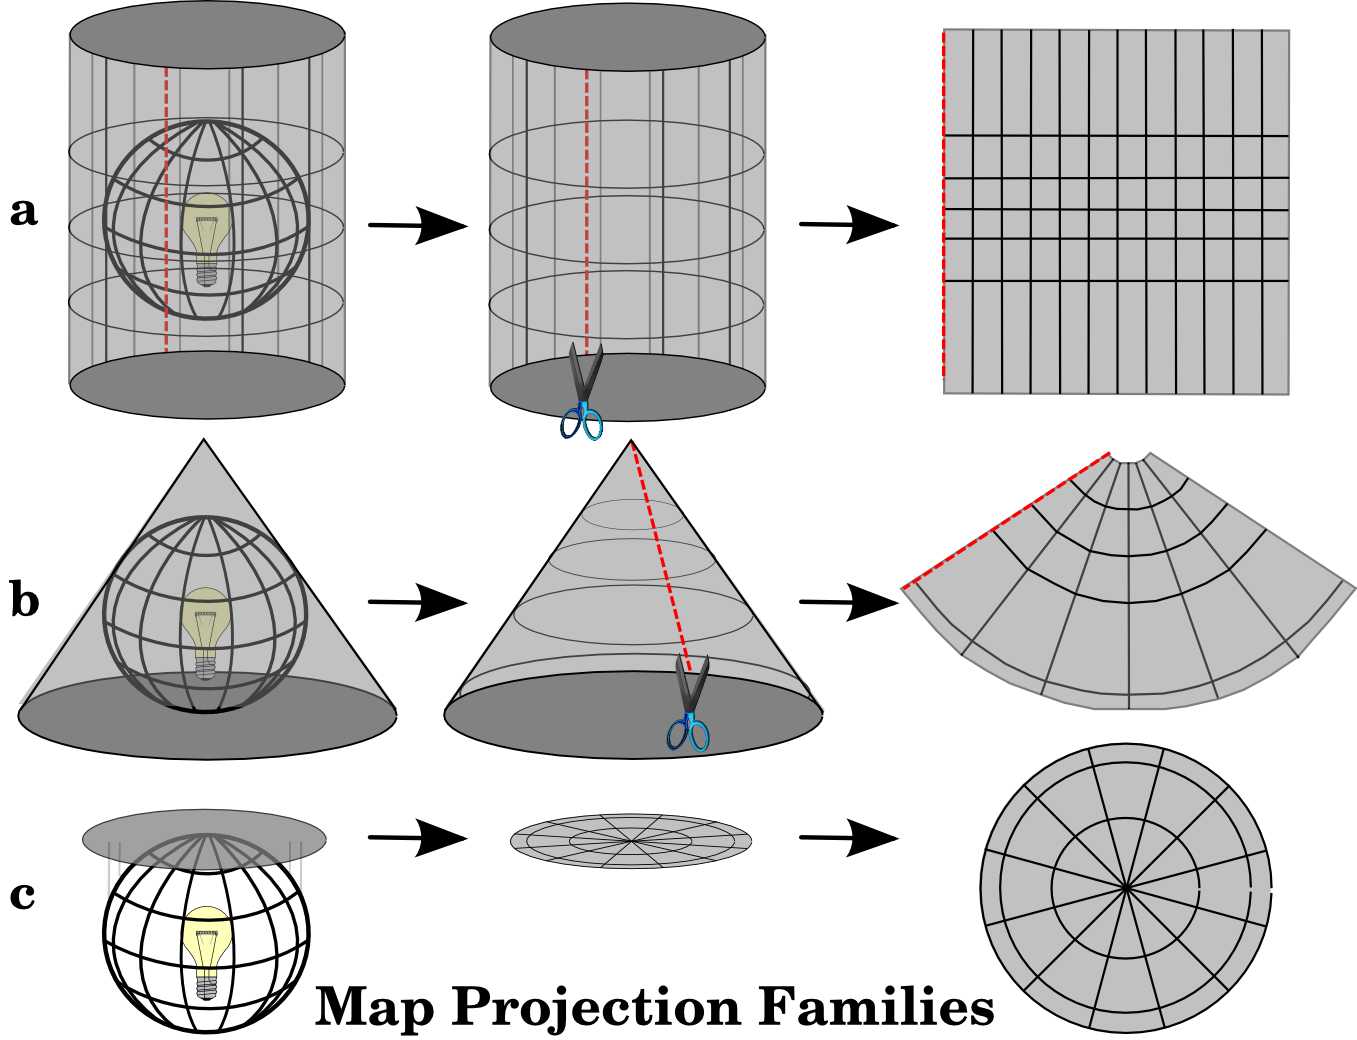

#### No CRS is perfect! Distortion of shape/distance/area

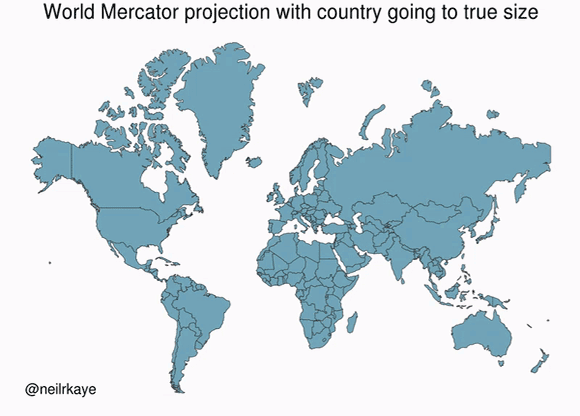

In [2]:
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

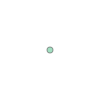

In [3]:
Point(0,0)

In [4]:
a = Point(0, 0)
b = Point(1, 0)
a.distance(b)

1.0

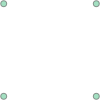

In [5]:
MultiPoint([(0,0), (0,1), (1,1), (1,0)])

3.0
<class 'shapely.geometry.linestring.LineString'>


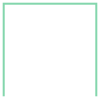

In [17]:
line = LineString([(0,0), (0,1), (1,1), (1,0)])
print(line.length)
print(type(line))
line
#line = LineString([(0,0), (0,1), (1,1), (1,0), (0,0)])
#line


2.025 12.727629731932698


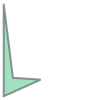

In [15]:
pol = Polygon([(0,0), (0,5), (0.5,1), (2,0.9)])
print(pol.area, pol.length)
pol

In [16]:
pol.intersects(line)

True

In [18]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [19]:
world.crs

{'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True}

In [20]:
world_new = world.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
world_new.crs

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


'+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

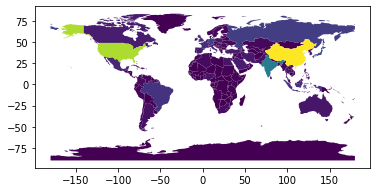

In [24]:
world.plot("pop_est")

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

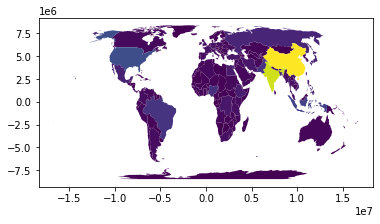

In [26]:
world_new.plot("pop_est")

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array

<AxesSubplot:>

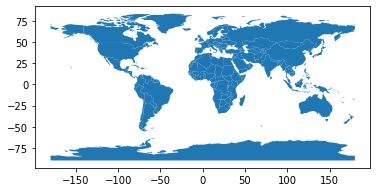

In [29]:
world.to_crs("epsg:4326").plot()

# Redo John Snow's analysis identifying the source of the 1854 cholera outbreak on London's Broad Street. 
The first-ever geospatial analysis!

Read the story here:
https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak

In [31]:
import contextily as ctx

deaths_df = gpd.read_file('SnowGIS/Cholera_Deaths.shp')
pumps_df = gpd.read_file('SnowGIS/Pumps.shp')

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [32]:
deaths_df

,Id,Count,geometry
0,0,3,POINT (529308.741 181031.352)
1,0,2,POINT (529312.164 181025.172)
2,0,1,POINT (529314.382 181020.294)
3,0,1,POINT (529317.380 181014.259)
4,0,4,POINT (529320.675 181007.872)
...,...,...,...
245,0,3,POINT (529362.665 181156.058)
246,0,2,POINT (529365.152 181176.129)
247,0,1,POINT (529274.165 180907.313)
248,0,1,POINT (529299.361 180873.185)


In [33]:
pumps_df

,Id,geometry
0,0,POINT (529396.539 181025.063)
1,0,POINT (529192.538 181079.391)
2,0,POINT (529183.740 181193.735)
3,0,POINT (529748.911 180924.207)
4,0,POINT (529613.205 180896.804)
5,0,POINT (529453.586 180826.353)
6,0,POINT (529593.727 180660.455)
7,0,POINT (529296.104 180794.849)


<AxesSubplot:>

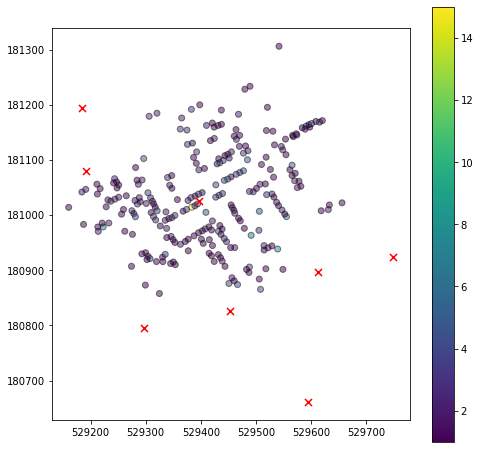

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
deaths_df.plot(ax=ax, column='Count', alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50)

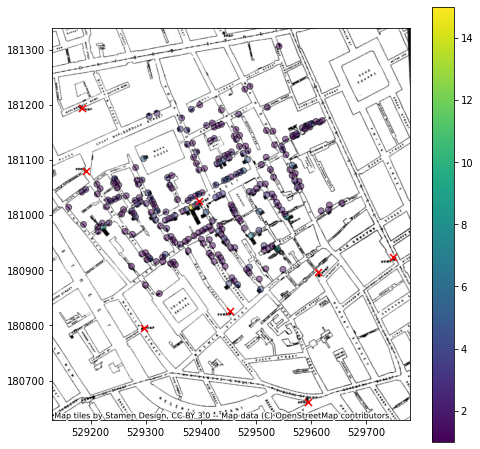

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
deaths_df.plot(ax=ax, column='Count', alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50)

ctx.add_basemap(
    ax,
    # CRS definition. Without the line below, the map stops making sense
    crs=deaths_df.crs,
)

ctx.add_basemap(ax,
    crs=deaths_df.crs,
    # Using the original map, hand-drawn by Snow
    source="SnowGIS/SnowMap.tif"
)

<AxesSubplot:>

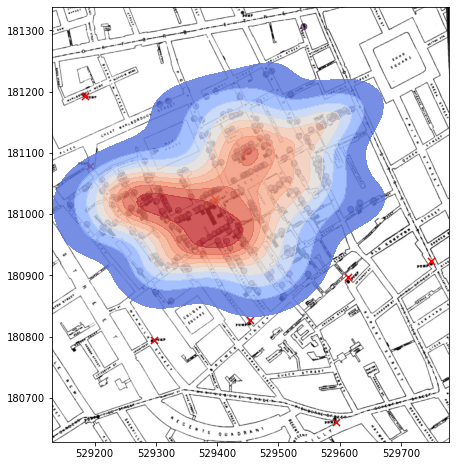

In [57]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
deaths_df.plot(ax=ax, column='Count', alpha=0.5, edgecolor='k', legend=False)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50)

ctx.add_basemap(ax,
    crs=deaths_df.crs,
    # Using the original map, hand-drawn by Snow
    source="SnowGIS/SnowMap.tif"
)

x = deaths_df.geometry.x
y = deaths_df.geometry.y
sns.kdeplot(data=deaths_df,
            x=x, 
            y=y, 
            fill=True,
            cmap='coolwarm',
            alpha=0.8, 
            gridsize=100,
            levels=10,
            ax=ax)

In [106]:
import pandas as pd

tmp = pd.read_csv("2893390.csv")
tmp = tmp.loc[(tmp.DATE == '2022-01-01') & tmp.TMAX.notnull()]
tmp

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TOBS
0,USW00004803,"RHINELANDER ONEIDA CO AIRPORT, WI US",45.63143,-89.48240,502.2,2022-01-01,NaN,-11.7,-16.1,NaN
335,USC00475164,"MATHER 3 NW, WI US",44.17460,-90.34820,298.1,2022-01-01,NaN,-2.2,-13.9,-13.3
419,USC00471923,"CUMBERLAND, WI US",45.53310,-92.02260,378.0,2022-01-01,NaN,-7.2,-10.6,-10.6
475,USC00477464,"ST. CROIX FALLS, WI US",45.41170,-92.64660,228.6,2022-01-01,NaN,-19.4,-29.4,NaN
531,USW00094994,"BOSCOBEL AIRPORT, WI US",43.15614,-90.67757,203.1,2022-01-01,NaN,-3.9,-12.8,NaN
...,...,...,...,...,...,...,...,...,...,...
22639,USC00478672,"TWO RIVERS, WI US",44.14300,-87.56770,179.5,2022-01-01,NaN,-1.1,-7.8,-7.8
22694,USC00474195,"KEWAUNEE, WI US",44.46280,-87.50491,180.7,2022-01-01,NaN,-1.7,-7.8,-7.8
22810,USW00014920,"LA CROSSE MUNICIPAL AIRPORT, WI US",43.87922,-91.25301,198.2,2022-01-01,-11.6,-10.6,-18.9,NaN
22875,USW00014921,"LONE ROCK TRI CO AIRPORT, WI US",43.21106,-90.18739,218.0,2022-01-01,NaN,-4.4,-11.7,NaN


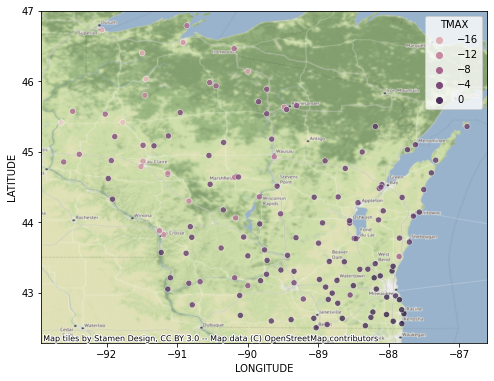

In [107]:
fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(data=tmp,
            x="LONGITUDE", 
            y="LATITUDE", 
            hue="TMAX",
            #hue="Daily Mean PM2.5 Concentration",
            alpha=0.8, 
            ax=ax)

ctx.add_basemap(
    ax,
    # CRS definition. Without the line below, the map stops making sense
    crs="epsg:4326"
)

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


<AxesSubplot:>

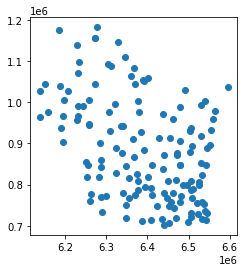

In [108]:
# convert a pandas dataframe to geopandas dataframe and use a crs without distance distortion
gtmp = (gpd.GeoDataFrame(tmp, 
                          crs="EPSG:4326", 
                          geometry = gpd.points_from_xy(tmp["LONGITUDE"], tmp["LATITUDE"]))
            .to_crs("EPSG:3347"))

gtmp["x"], gtmp["y"] = gtmp.geometry.x, gtmp.geometry.y

gtmp.plot()

In [92]:
!pip install scikit-gstat
!pip install pykrige

     |████████████████████████████████| 212 kB 5.0 MB/s eta 0:00:01


/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/skgstat/plotting/variogram_dd_plot.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


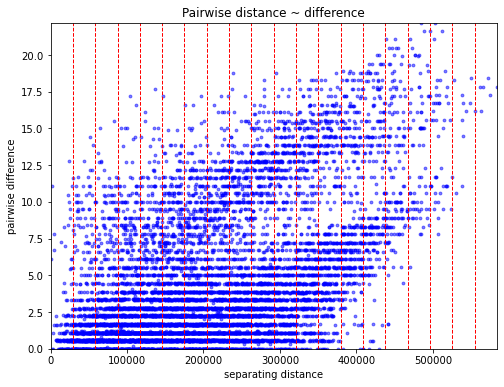

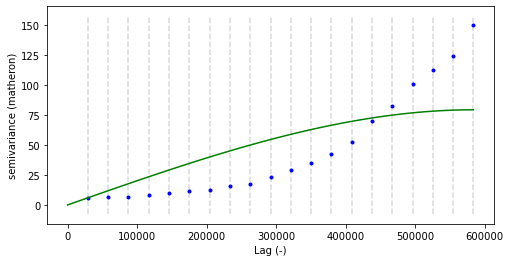

In [109]:
import skgstat

vario = skgstat.Variogram(coordinates=gtmp[["x", "y"]],
                  values=gtmp["TMAX"],
                  n_lags=20)
vario.distance_difference_plot();
vario.plot(hist=False);


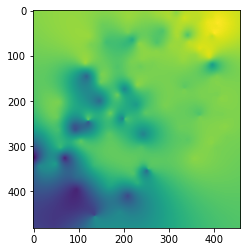

In [110]:
from pykrige.ok import OrdinaryKriging
import numpy as np

krig = OrdinaryKriging(x=gtmp["x"], y=gtmp["y"], z=gtmp["TMAX"], variogram_model="spherical")
resolution = 1000
gridx = np.arange(gtmp.bounds.minx.min(), gtmp.bounds.maxx.max(), resolution)
gridy = np.arange(gtmp.bounds.miny.min(), gtmp.bounds.maxy.max(), resolution)

z, ss = krig.execute("grid", gridx, gridy)
plt.imshow(z);